In [8]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from dotenv import load_dotenv
import os
from datasets import Dataset
from ragas.metrics import answer_relevancy, faithfulness, context_recall, context_precision
from ragas import evaluate

load_dotenv()

groq = os.getenv("groqkey")

evaluator_llm = LangchainLLMWrapper(ChatGroq(temperature=0, model="llama-3.1-70b-versatile", api_key=groq))
evaluator_embeddings = LangchainEmbeddingsWrapper(HuggingFaceEmbeddings(model_name="NeuML/pubmedbert-base-embeddings"))

def calculate_RAGAS_answer(generated_answer, gold_answer, question, context):
  data = {'question': [question],
          'contexts': [context],
          'answer': [generated_answer],
          'ground_truth': [gold_answer]}
  dataset = Dataset.from_dict(data)
  score = evaluate(dataset, llm=evaluator_llm, embeddings=evaluator_embeddings, metrics = [faithfulness, answer_relevancy, context_precision, context_recall]).to_pandas()
  faithfulness_score = score['faithfulness'].iloc[0]
  answer_relevancy_score = score['answer_relevancy'].iloc[0]
  context_precision_score = score['context_precision'].iloc[0]
  context_recall_score = score['context_recall'].iloc[0]
  return faithfulness_score, answer_relevancy_score, context_precision_score, context_recall_score

generated_answer = "The first superbowl was held on Jan 15, 1967"
gold_answer = "The first superbowl was held on Jan 15, 1967"
question = "When was the first super bowl?"
context = ["The First AFL–NFL World Championship Game was an American football game played on January 15, 1967, at the Los Angeles Memorial Coliseum in Los Angeles."]

x = calculate_RAGAS_answer(generated_answer, gold_answer, question, context)

print(x)

Evaluating: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


(nan, 0.9035612809630441, 0.9999999999, 1.0)


In [3]:
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix, precision_score, precision_recall_fscore_support, recall_score
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import requests

In [4]:
def evaluate_multiclass_classification(y_true, y_pred, class_labels):
    """
    Evaluates a multiclass classification model.
    
    y_true: Ground truth labels
    y_pred: Predicted labels from the classifier
    class_labels: List of class names
    
    Returns a dictionary of accuracy, precision, recall, F1, and confusion matrix.
    """
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision, Recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')  # macro-averaging
    
    # Classification report (optional detailed breakdown for each class)
    class_report = classification_report(y_true, y_pred, target_names=class_labels)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Macro Avg): {precision:.4f}")
    print(f"Recall (Macro Avg): {recall:.4f}")
    print(f"F1 Score (Macro Avg): {f1:.4f}")
    print("\nClassification Report:\n", class_report)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Return metrics for further analysis if needed
    return {
        "accuracy": accuracy,
        "precision_macro": precision,
        "recall_macro": recall,
        "f1_macro": f1,
        "confusion_matrix": conf_matrix
    }


In [1]:
import requests
import pandas as pd
import time

#  uvicorn Example_API:app

def call_deprescribe_api(input_data):
    print(input_data)
    url = 'http://localhost:8000/Deprescribe'
    response = requests.get(url, params={'key': input_data})
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
        return None

data = pd.read_csv('../../data/LabeledResponses.csv')

results_df = pd.DataFrame(columns=['key', 'rec', 'response'])

for key in data['key']:
    start = time.time()
    response = call_deprescribe_api(key)
    if response is not None:
        new_row = pd.DataFrame([{'key': key, 'rec': response[0], 'response': response[1]}])
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    else: 
        new_row = pd.DataFrame([{'key': key, 'rec': "None", 'response': "Bug"}])
        results_df = pd.concat([results_df, new_row], ignore_index=True)
    print(f"{key} took {time.time() - start} seconds to process.")

results_df.to_csv('../../data/model_results.csv', index=False)

# Call the API
# result = call_deprescribe_api(input_data)
# print(result)



D6253A5CE371EA
Error: 500
Internal Server Error
D6253A5CE371EA took 30.509119510650635 seconds to process.
DFAFED1811B871
DFAFED1811B871 took 41.22423577308655 seconds to process.
D4865B8BBB294E
D4865B8BBB294E took 63.5000114440918 seconds to process.
D00F3A8D5F43B2
D00F3A8D5F43B2 took 167.7087800502777 seconds to process.
D8017C77BA15FA
Error: 500
Internal Server Error
D8017C77BA15FA took 8.749300718307495 seconds to process.
DA15CCF42ACF8B
Error: 500
Internal Server Error
DA15CCF42ACF8B took 17.6386878490448 seconds to process.
D45728A2EFD315
Error: 500
Internal Server Error
D45728A2EFD315 took 8.644673347473145 seconds to process.
DFB07E6B8F0957
DFB07E6B8F0957 took 44.883386850357056 seconds to process.
D1BD3665C06499
D1BD3665C06499 took 47.63405203819275 seconds to process.
D068E26FFF9F43
D068E26FFF9F43 took 38.55686640739441 seconds to process.
D0E44FD0BBD96F
D0E44FD0BBD96F took 123.88289213180542 seconds to process.
D17AFAD1D7BB68
Error: 500
Internal Server Error
D17AFAD1D7BB68 t

Accuracy: 0.7273
Precision (Macro Avg): 0.7000
Recall (Macro Avg): 0.7111
F1 Score (Macro Avg): 0.6796

Classification Report:
               precision    recall  f1-score   support

    continue       0.60      1.00      0.75         3
 deprescribe       1.00      0.80      0.89         5
        stop       0.50      0.33      0.40         3

    accuracy                           0.73        11
   macro avg       0.70      0.71      0.68        11
weighted avg       0.75      0.73      0.72        11



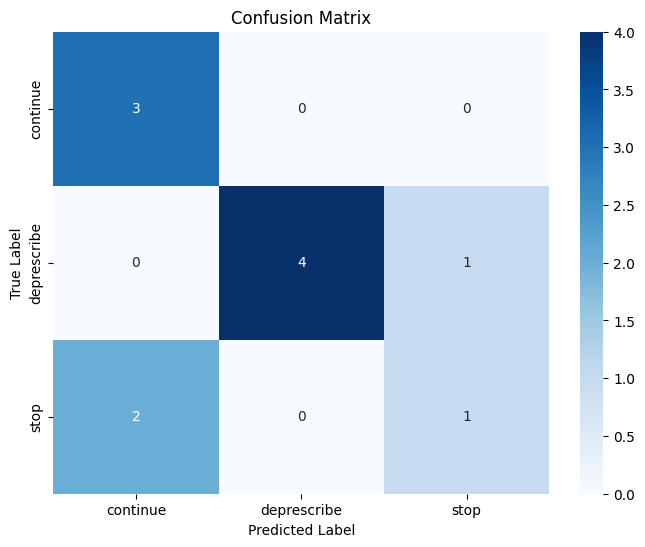

In [11]:
# load data
ground_truth = pd.read_csv('../../data/LabeledResponses.csv')
test = pd.read_csv('../../data/model_results.csv')

test_clean = test.dropna(subset=['rec'])
ground_truth = ground_truth[ground_truth['key'].isin(test_clean['key'])]

y_true = ground_truth['recommendation']
y_pred = test_clean['rec']
class_labels = ['continue', 'deprescribe', 'stop']

# Evaluate the model
metrics = evaluate_multiclass_classification(y_true, y_pred, class_labels)